<a href="https://colab.research.google.com/github/rayan-roy/Deep-learning-using-Boston-Housing-dataset/blob/master/Deeplearning_housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install tensorflow


In [5]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
bostondata = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv" )

In [8]:
bostondata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


Before we do any analysis, we always want to separate the data as input and output variable.

Our target column is MEDV


In [9]:
# We select 1 on the bottom because we are dropping in a column and not row
X = bostondata.drop("MEDV", axis = 1) 
y = bostondata.MEDV 
# Or you can do y = boston_data["MEDV"] 

## Splitting the dataset


In [10]:
from sklearn.model_selection import train_test_split 

# We are assigning 20% to the test data and 80% to the train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [11]:
# Finding the number of feature
# Note 1 stands for no of column, while 0 stands for no of rows
n_features = X.shape[1]
print(n_features)

13


In [12]:
# We will be using Sequential API
#It is referred to as “sequential” because it involves defining a Sequential class and 
#adding layers to the model one by one in a linear manner, from input to output.

The example below defines a Sequential MLP model that accepts one input (i.e. 'YearsExperience'), has one hidden layer with 1 node and then an output layer with one node to predict a numerical value.

In [13]:
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
import tensorflow

Note that the visible layer of the network is defined by the “input_shape” argument on the first hidden layer. That means in the below example, the model expects the input for one sample to be a vector of n_features (our case its 13)


The sequential API is easy to use because you keep calling model.add() until you have added all of your layers


The activation function we have chosen is ReLU, which stands for rectified linear unit. Activation function decides, whether a neuron should be activated or not


ReLU is defined mathematically as F(x) = max(0,x). In other words, the output is x, if x is greater than 0, and the output is 0 if x is 0 or negative.

In [14]:
model = Sequential()
# We added 3 layers
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


An Optimizer helps optimize a cost function

## Compiling the Model


Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error (lin regression) or cross-entropy (used for binary classification).

It also requires that you select an algorithm to perform the optimization procedure. We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation.

It may also require that you select any performance metrics to keep track of during the model training process. The loss function used here is mean squared error.

In [16]:
# import RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01)    # 0.01 is the learning rate

You may wonder why learning rate of 0.01? 
Usually its between 1 and 10^(-6) but you it can be determined using trial and error

Tradtionally its 0.1, or 0.01 or 0.03


In [17]:
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model
# We see the optimizer was a RmSprop which is also root mean square propagation

## Fitting the model
Fitting the model requires that you first select the training configuration, such as the number of epochs (loops through the training dataset) and the batch size (number of samples in an epoch used to estimate model error).

Training applies the chosen optimization algorithm to minimize the chosen loss function and updates the model using the backpropagation


---


Fitting the model is the slow part of the whole process and can take seconds to hours to days, depending on the complexity of the model, the hardware you’re using, and the size of the training dataset.

While fitting the model, a progress bar will summarize the status of each epoch and the overall training process.



**Seed Everything**
We want to seed everything in order to replicate or have consistent randomization in code. The weights of paramters are usually randomized.
When we seed, we can reproduce these results.

**So say we said 42, if we say 80  next time, and then again 42, both times when 42 is used, we get the same results**

In [18]:
X_train.shape #  => (323,13)
X_train.shape[0] # => 323
X_train.shape[1] # => 13

13

In [19]:
seed_value = 42
seed(seed_value)        # If you build the model with given parameters, 
#set_random_seed will help you produce the same result on multiple execution


# Recommended by Keras --------------------------------------------------------
# 1. Set 'PYTHONHASHSEED' environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set 'python' built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set 'numpy' pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value) 
model.fit(X_train, y_train, epochs=10, batch_size=30, verbose = 1)

# By now the model has learned the coefficient m, and c of mx+c

Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 325.7995
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 87.7003
Epoch 3/10
11/11 [==============================] - 0s 1ms/step - loss: 102.2011
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 97.3594
Epoch 5/10
11/11 [==============================] - 0s 1ms/step - loss: 73.5658
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 100.7587
Epoch 7/10
11/11 [==============================] - 0s 1ms/step - loss: 72.4126
Epoch 8/10
11/11 [==============================] - 0s 1ms/step - loss: 88.2007
Epoch 9/10
11/11 [==============================] - 0s 1ms/step - loss: 88.9650
Epoch 10/10
11/11 [==============================] - 0s 1ms/step - loss: 87.7681


What is verbose?

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this: [======]
progres_bar

verbose=2 will just mention the number of epoch like this: Epoch 1/10

verbose = 2 

## Evaluate the Model

Evaluating the model requires that you first choose small subset of a dataset used to evaluate the model. This should be data not used in the training process i.e. the X_test.

In [20]:
model.evaluate(X_test, y_test) #evaluate on the 20% of the test based on the model coefficent that it was trained

3/3 [==============================] - 0s 2ms/step - loss: 50.1649


50.16490936279297

The mean squared error we got here is 50.16. Now, what does it mean?

When you subtract the predicted values (of X_test data) from the acutal value (of X_test data), then square it and sum all the squares, and finally take a mean (i.e. average) of it, the result you will get is 50.16 in this case.


In [ ]:
model.predict(X_test) #Gives the predicted Y values

In [21]:
# Plotting the loss curve:

def plotting_the_loss_curve(epochs, rmse):
  "Returns the curve of loss vs epoch"
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse,label="Loss")
  plt.legend()
  plt.show()

## Hyper Parameter tuning
We will be testing different rates to find an optimal option

**Learning Rate**

A scalar used to train a model via gradient descent. During each iteration, the gradient descent algorithm multiplies the learning rate by the gradient. The resulting product is called the gradient step.

Learning rate is a key hyperparameter.

In [23]:
# Model 1
# Changing alpha from 0.01 to 0.1
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

optimizer = RMSprop(0.1)    # 0.1 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model

# fit the model 
history = model.fit(X_train, y_train, epochs=10, batch_size=30, verbose = 1)

# evaluate the model
print('The MSE value is: ', model.evaluate(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 0s 1ms/step - loss: 9724.5732
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 582.0069
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 555.8216
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 521.9396
Epoch 5/10
11/11 [==============================] - 0s 1ms/step - loss: 483.8689
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 444.7491
Epoch 7/10
11/11 [==============================] - 0s 1ms/step - loss: 406.9054
Epoch 8/10
11/11 [==============================] - 0s 1ms/step - loss: 371.2612
Epoch 9/10
11/11 [==============================] - 0s 1ms/step - loss: 337.6587
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 271.3606
The MSE value is:  271.3605651855469


We see that the loss is 306.2268, which is worst that we had. Note you look at the last loss and not the MSE value



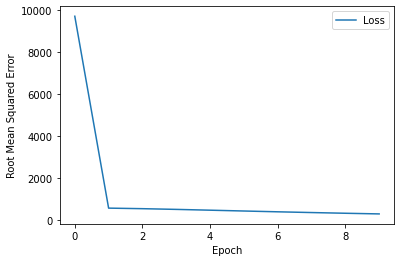

In [24]:
# TO observe the deviation
plotting_the_loss_curve(history.epoch, history.history["loss"])
# You need to use history function for some reason, don't know why

**As the number of epochs increases, the model learns better and RMSE starts ro decrease**


We will be testing different learning rate and how it works


In [25]:
learning_rate = 0.03          
epochs = 10
optimizer = RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model
model.fit(X_train, y_train, epochs=epochs, batch_size=30)     # fit the model
model.evaluate(X_test, y_test)       # Evaluate the model

Epoch 1/10
11/11 [==============================] - 0s 1ms/step - loss: 281.2031
Epoch 2/10
11/11 [==============================] - 0s 1ms/step - loss: 269.7977
Epoch 3/10
11/11 [==============================] - 0s 1ms/step - loss: 260.7584
Epoch 4/10
11/11 [==============================] - 0s 1ms/step - loss: 252.4206
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 244.3937
Epoch 6/10
11/11 [==============================] - 0s 1ms/step - loss: 236.4837
Epoch 7/10
11/11 [==============================] - 0s 1ms/step - loss: 228.8299
Epoch 8/10
11/11 [==============================] - 0s 1ms/step - loss: 221.4789
Epoch 9/10
11/11 [==============================] - 0s 1ms/step - loss: 214.3056
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 184.8917


184.89169311523438

We see that as we decreased the learning rate from 0.01 to 0.03 the loss decreased to 184.8917

Now, we are going to test with **epochs**
In the code below, Epoch will be increased from 10 to 100

In [ ]:
learning_rate = 0.03          
epochs = 100
optimizer = RMSprop(learning_rate)
model.compile(loss='mean_squared_error',optimizer=optimizer)    # compile the model
model.fit(X_train, y_train, epochs=epochs, batch_size=30)     # fit the model
model.evaluate(X_test, y_test)       # Evaluate the model

It can be seen as we increased the epoch while keep the **learning rate** same/constant, the loss decreased to 71.

Note the downside is that the model might overfit too much by learning the pattern, which is not good either

Now we will test with **Batch Size** which is basically the number of batches in a batch

In [ ]:
# Model 2
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

optimizer = RMSprop(0.01)    # 0.1 is the learning rate
model.compile(loss='mean_squared_error',optimizer=optimizer)   

# fit the model 
model.fit(X_train, y_train, epochs=10, batch_size=40, verbose = 1) # Batch size increased from 30 to 40

# evaluate the model
print('The MSE value is: ', model.evaluate(X_test, y_test))

We see that increasing the batch size made the model better as lowest loss was 122 as compared to model 1 (right below **learning rate**), which was 306. 

What we learn is that we need to be testing in order to see what fits the model. The law of large numbers may not work all the time, where higher the n the better it is

## Conclusion

Most machine learning problems require a lot of hyperparameter tuning. 

Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. We must experiment to find the best set of hyperparameters